### Project: Customer Request Analysis

DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.


Perform the following steps:

#### 1. Understand the dataset:

Identify the shape of the dataset
Identify variables with null values

#### 2. Perform basic data exploratory analysis:

Utilize missing value treatment
Analyze the date column and remove the entries if it has an incorrect timeline
Draw a frequency plot for city-wise complaints
Draw scatter and hexbin plots for complaint concentration across Brooklyn

#### 3. Find major types of complaints:

Plot a bar graph of count vs. complaint types
Find the top 10 types of complaints
Display the types of complaints in each city in a separate dataset


#### 4. Visualize the major types of complaints in each city

#### 5. Check for the average response time across various types of complaints


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1. Understand the dataset:
    - Identify the shape of the dataset 
    - Identify variables with null values

In [2]:
file_url= "311_Service_Requests_from_2010_to_Present.csv"   #Reading data and also parsing date columns

data= pd.read_csv(file_url, parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'], low_memory=False)

data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
data.shape  #shape of dataset

(364558, 53)

In [4]:
data.isnull().sum()  # inspecting null values

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [6]:
#dropping columns having complete Null values

nyc = data.drop(['Garage Lot Name', 'Taxi Pick Up Location', 'Taxi Company Borough', 'Vehicle Type', 'School or Citywide Complaint'], axis=1)

nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

### Q2. Perform basic data exploratory analysis:

    - Utilize missing value treatment Analyze the date column and remove the entries if it has an incorrect timeline 
    - Draw a frequency plot for city-wise complaints 
    - Draw scatter and hexbin plots for complaint concentration across Brooklyn


In [8]:
nyc['Created Date'].isnull().sum()  #checking missing values in date columns

0

In [9]:
nyc['Closed Date'].isnull().sum()    

2381

In [10]:
nyc.loc[nyc['Closed Date'].isnull()]   #locating all null entries in 'Closed Date' column

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,2015-12-31 14:16:04,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,2015-12-31 09:58:06,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,2015-12-30 05:13:42,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,2015-12-29 22:44:50,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,2015-12-29 19:09:13,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363643,29618691,2015-01-02 11:38:52,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,217-0-217- 89TH AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363789,29619230,2015-01-02 07:25:16,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,2101-2527 INDEPENDENCE AVE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363805,29618672,2015-01-02 06:14:06,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,217-0-217- 89TH AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364151,29617561,2015-01-01 16:04:35,NaT,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,6940-6966 62ND AVE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
nyc1 = nyc.dropna(subset=["Closed Date"], axis=0)      #Removing null entries

In [15]:
nyc1['Closed Date'].isnull().sum()           #rechecking for missing/incorrect values in date columns

0

In [16]:
nyc1.shape         

(362177, 48)

In [17]:
nyc1.head()   #new dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [18]:
# Display the complaint type and city together

nyc1[['Complaint Type', 'City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [19]:
nyc1['City'].value_counts()  #citywise total complaints

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

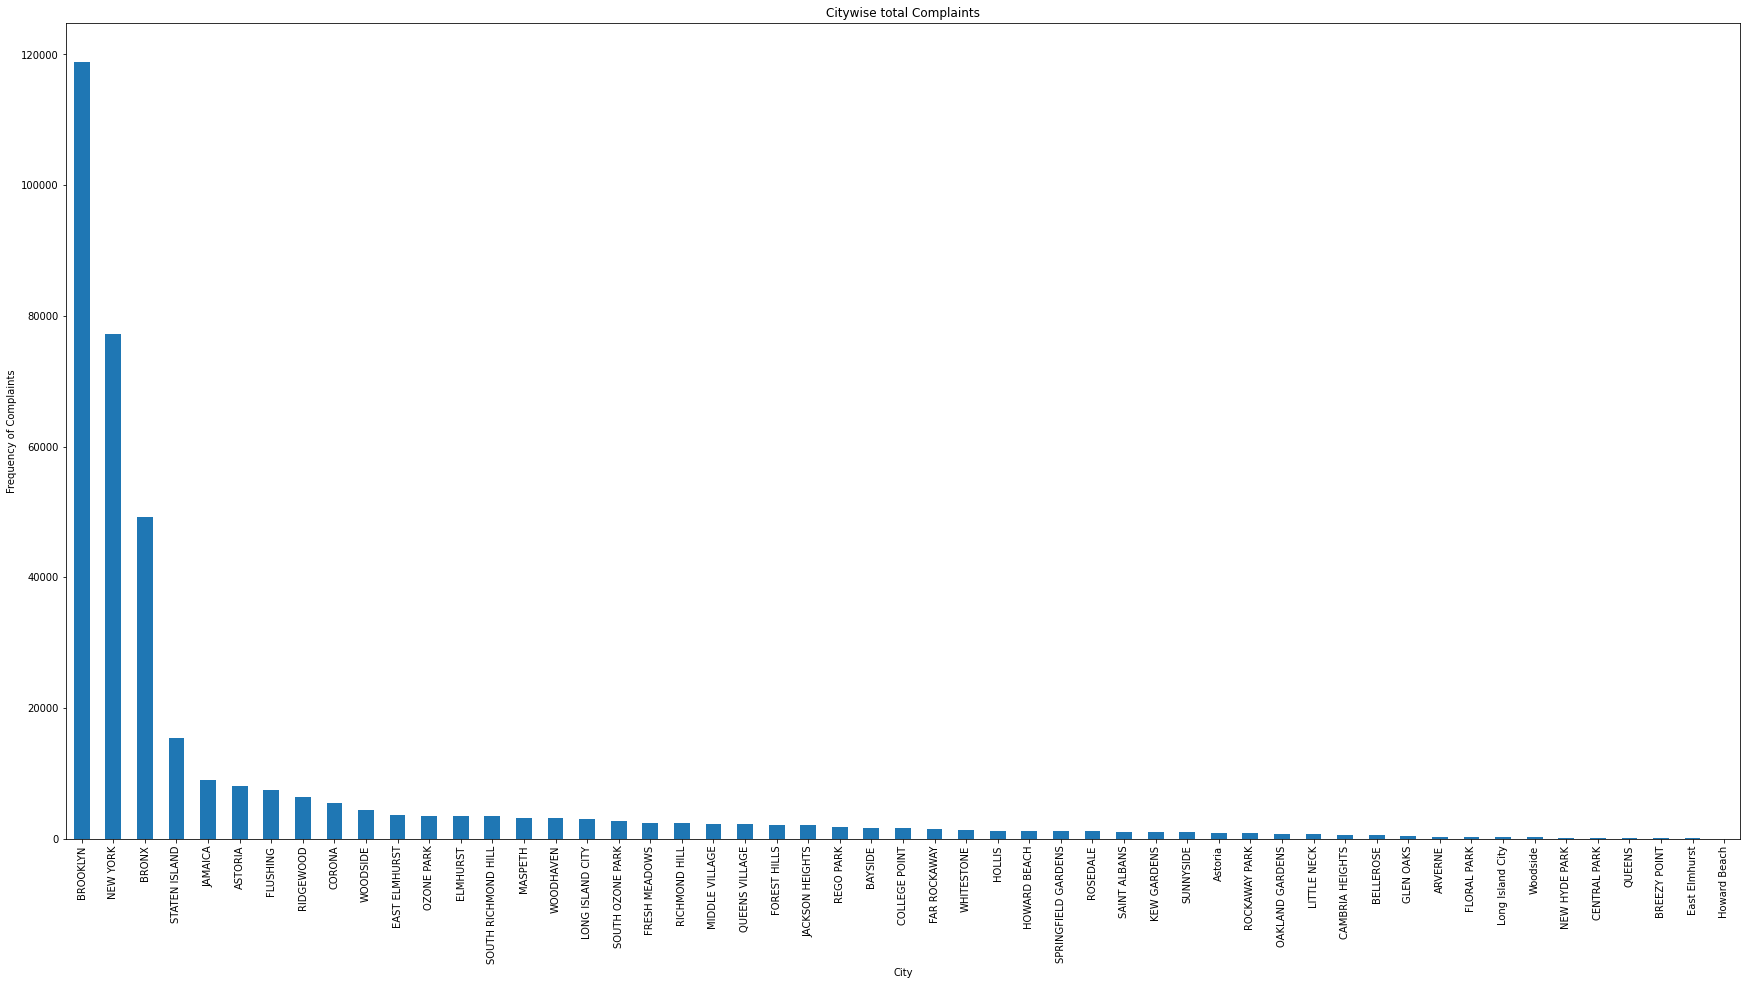

In [20]:
#Frequency plot for city-wise complaints

plt.figure(figsize=(30,15))
nyc1['City'].value_counts().plot(kind='bar',title='Citywise total Complaints', xlabel='City', ylabel='Frequency of Complaints')
plt.show()

##### So from the above plot we can conclude that Brooklyn City records highest number of complaints followed by New York city

<AxesSubplot:title={'center':'Citywise top 20 Complaints'}, xlabel='City', ylabel='Frequency of Complaints'>

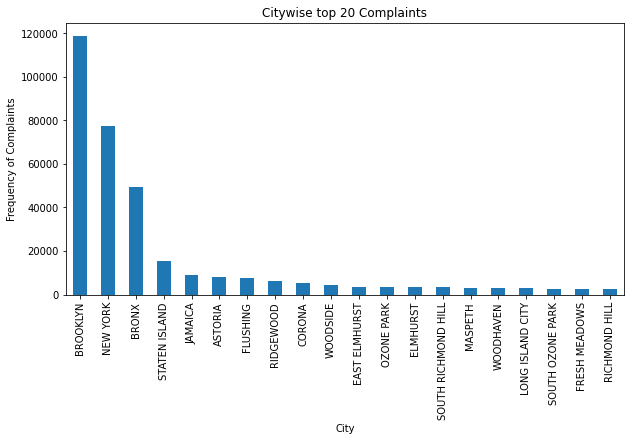

In [26]:
#Top 20 City-wise Complaints

plt.figure(figsize=(10,5))
nyc1['City'].value_counts().head(20).plot(kind='bar',title='Citywise top 20 Complaints', xlabel='City', ylabel='Frequency of Complaints')


In [31]:
#Analyzing data for City Brooklyn

df_Brooklyn = nyc1[nyc1['City']=='BROOKLYN']
df_Brooklyn.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"


In [32]:
df_Brooklyn.shape

(118849, 48)

In [33]:
df_Brooklyn['Complaint Type'].value_counts()  #counts of different complaints in Brooklyn

Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}, xlabel='Complaints', ylabel='Frequency of Complaints'>

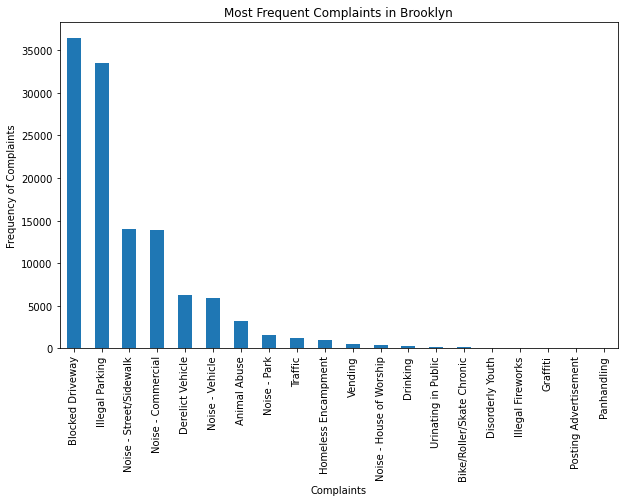

In [34]:
#visualizing complaints in Brooklyn

df_Brooklyn['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn',xlabel='Complaints', ylabel='Frequency of Complaints')


##### so from the above plot we can understand that Blocked Driveway and Illegal Parking are the major complaint areas in Brooklyn City

<AxesSubplot:title={'center':'Brooklyn Location Type vs Frequency of Complaints'}, xlabel='Location Type', ylabel='Frequency of Complaints'>

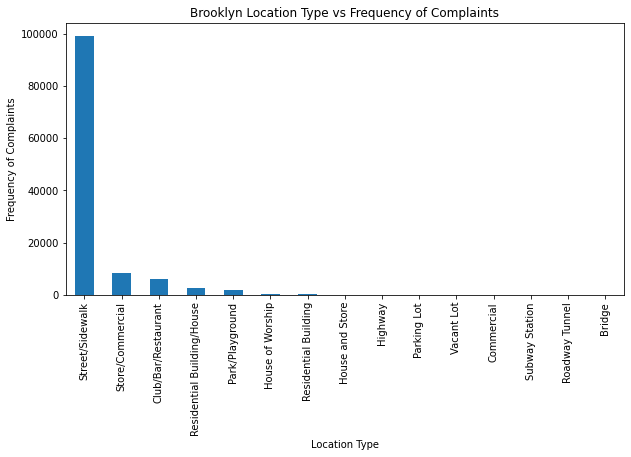

In [35]:
#visualizing location of complaints around Brooklyn

df_Brooklyn['Location Type'].value_counts().plot(kind='bar',figsize=(10,5),title = 'Brooklyn Location Type vs Frequency of Complaints',xlabel='Location Type', ylabel='Frequency of Complaints')

(-74.05061403028367, -73.84647934348564, 40.56112685375488, 40.78979838623255)

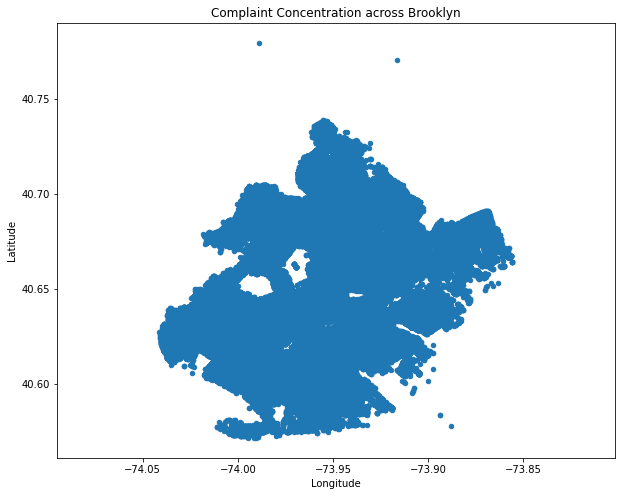

In [36]:
## Complaint concentration across Brooklyn    

#Scatter Plot

df_Brooklyn.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaint Concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.56112685375488, 40.78979838623255)

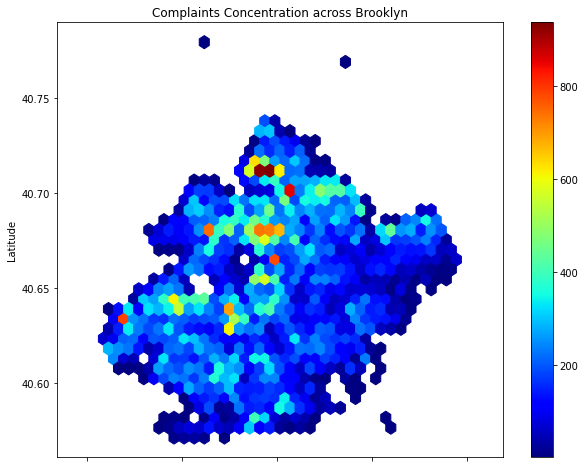

In [37]:
## Complaint concentration across Brooklyn   

#Hexbin Plot

df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=35,colormap = 'jet',mincnt=1,title = 'Complaints Concentration across Brooklyn', figsize=(10,8)).axis('equal')

##### In the above plots we can conclude that Hexbin plot gives a better indication of complaints concentration as compared to Scatter plot

### Q3. Find major types of complaints:
    - Plot a bar graph of count vs. complaint types 
    - Find the top 10 types of complaints 
    - Display the types of complaints in each city in a separate dataset

In [39]:
nyc1['Complaint Type'].unique() #Unique complaints

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

<AxesSubplot:title={'center':'Count vs Complaint Types'}, xlabel='Complaint Types', ylabel='Counts'>

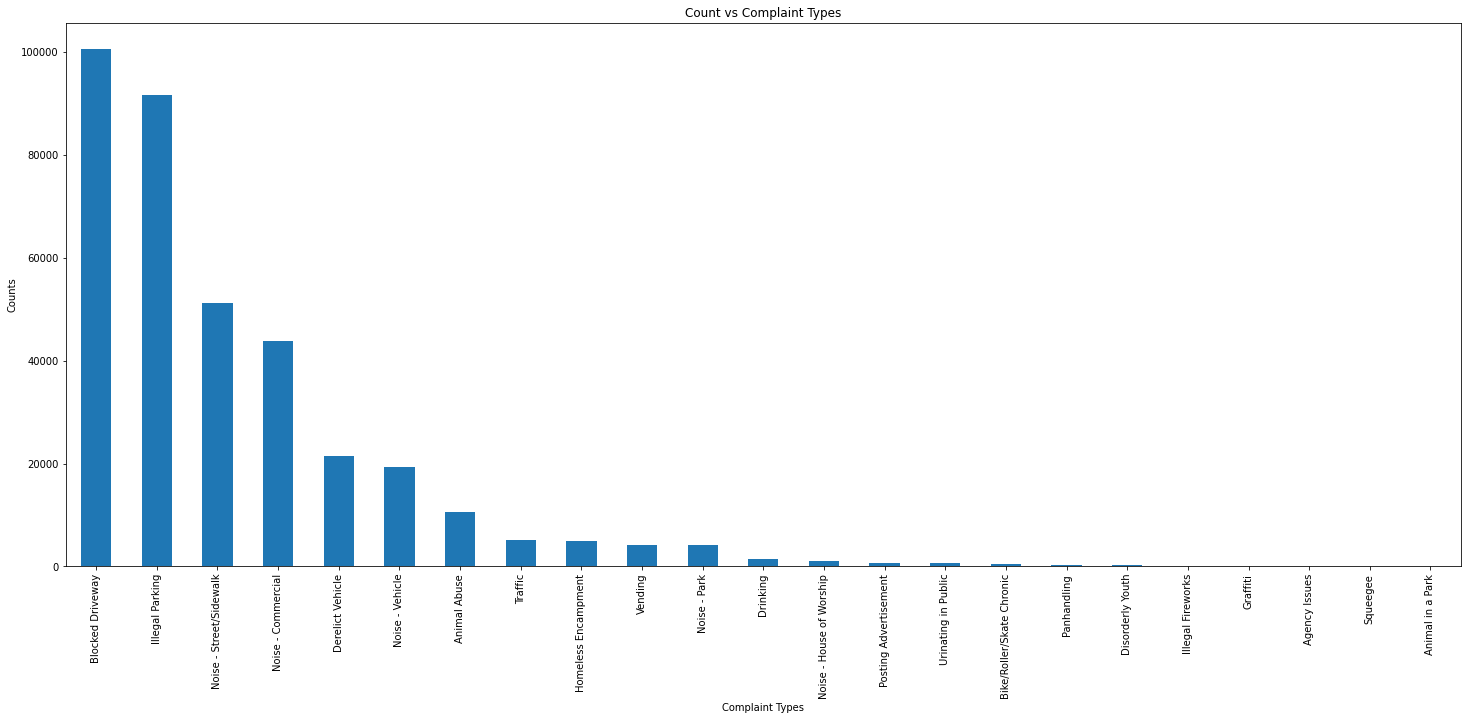

In [38]:
#Count vs Complaint Types

plt.figure(figsize=(25,10))
nyc1['Complaint Type'].value_counts().plot(kind='bar',title='Count vs Complaint Types', xlabel='Complaint Types', ylabel='Counts')


##### Blocked Driveway and Illegal Parking are the major Complaints in NYC followed by Noise

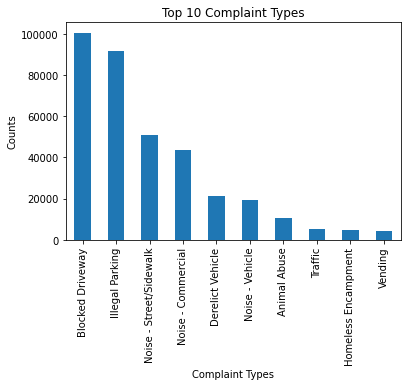

In [40]:
#Top 10 complaints

nyc1['Complaint Type'].value_counts().head(10).plot(kind='bar',title='Top 10 Complaint Types', xlabel='Complaint Types', ylabel='Counts')
plt.show()

In [42]:
#Preparing separate dataset to Display the types of complaints in each city

citywisecomplaints0 = nyc1.groupby(['City','Complaint Type']).size()

citywisecomplaints = pd.DataFrame({'Count':citywisecomplaints0}).reset_index()

citywisecomplaints.head()   #New Dataset
                                

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1


#### Q4. Visualize the major types of complaints in each city

In [43]:

citycomp = nyc1.groupby(['Complaint Type', 'City']).size().unstack()
citycomp.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,46.0,170.0,NaN,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,...,43.0,74.0,40.0,42.0,786.0,40.0,43.0,57.0,111.0,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,NaN,1.0,NaN,22.0,124.0,NaN,NaN,...,NaN,1.0,1.0,NaN,10.0,2.0,4.0,2.0,5.0,NaN
Blocked Driveway,50.0,3436.0,159.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,...,318.0,1202.0,1946.0,330.0,2845.0,278.0,279.0,1363.0,2038.0,27.0
Derelict Vehicle,32.0,426.0,14.0,231.0,120.0,3.0,2402.0,6257.0,148.0,NaN,...,248.0,425.0,356.0,267.0,2184.0,17.0,279.0,369.0,298.0,8.0


In [46]:
temp = nyc1['City'].value_counts()   #we previously investigated top Cities with maximum complaints
temp[:10]                         

BROOKLYN         118849
NEW YORK          77289
BRONX             49166
STATEN ISLAND     15335
JAMAICA            8930
ASTORIA            7991
FLUSHING           7486
RIDGEWOOD          6391
CORONA             5383
WOODSIDE           4357
Name: City, dtype: int64

In [47]:
temp[:10].keys()   #we shall visualize the complaints only for top 10 cities as major complaints are from these cities and plotting all 53 cities is not feasible

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE'],
      dtype='object')

In [48]:
#preparing Dataset for top 10 complaint cities
city_topcomplaints = citycomp[['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA','FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE']]
city_topcomplaints

City,BROOKLYN,NEW YORK,BRONX,STATEN ISLAND,JAMAICA,ASTORIA,FLUSHING,RIDGEWOOD,CORONA,WOODSIDE
Complaint Type,,,,,,,,,,
Animal Abuse,3191.0,1941.0,1971.0,786.0,317.0,170.0,191.0,154.0,104.0,111.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,124.0,254.0,22.0,10.0,3.0,16.0,3.0,3.0,NaN,5.0
Blocked Driveway,36445.0,2705.0,17062.0,2845.0,3620.0,3436.0,3640.0,2161.0,3597.0,2038.0
Derelict Vehicle,6257.0,695.0,2402.0,2184.0,1132.0,426.0,532.0,507.0,72.0,298.0
Disorderly Youth,79.0,81.0,66.0,25.0,9.0,5.0,2.0,3.0,6.0,1.0
Drinking,291.0,321.0,206.0,188.0,40.0,43.0,47.0,10.0,34.0,15.0
Graffiti,60.0,25.0,15.0,6.0,3.0,4.0,6.0,3.0,4.0,4.0
Homeless Encampment,948.0,3060.0,275.0,77.0,93.0,32.0,26.0,26.0,26.0,38.0


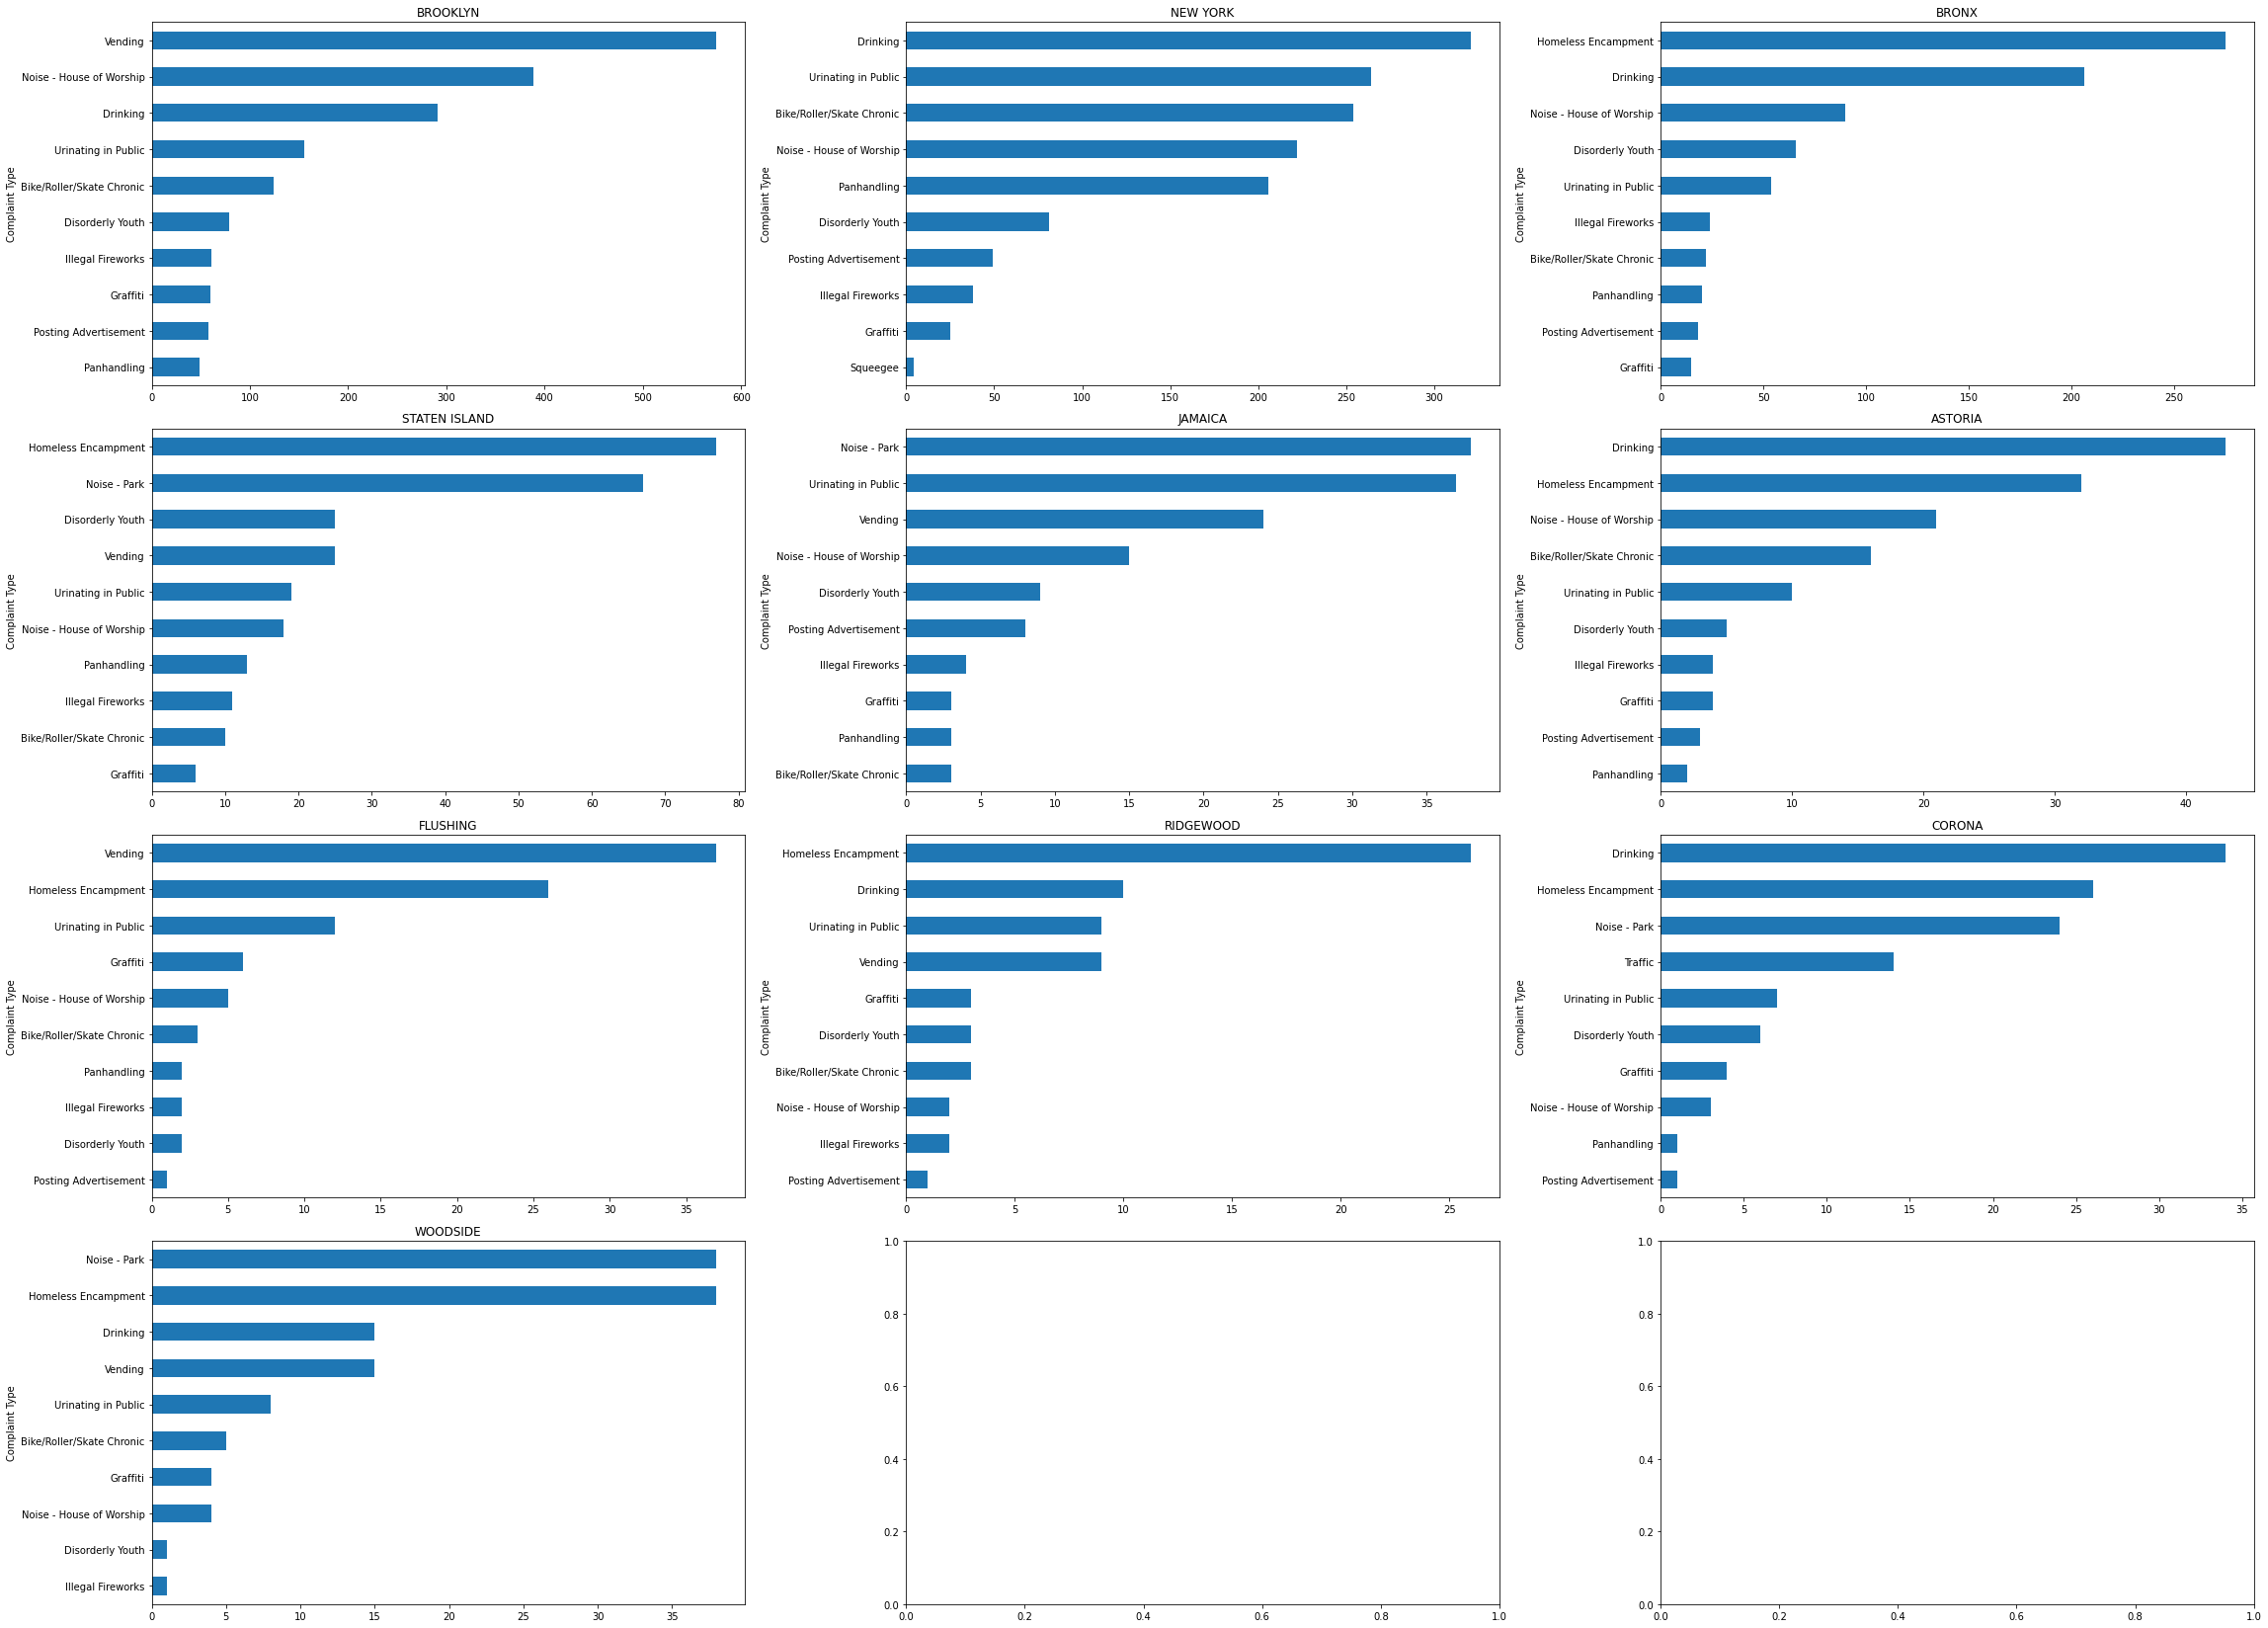

In [92]:
#visulization

col_number = 3
row_number = 4
fig, axes = plt.subplots(row_number,col_number, figsize=(32,23))

for d, (label,col) in enumerate(city_topcomplaints.iteritems()):
    ax = axes[int(d/col_number), d%col_number]
    col = col.sort_values(ascending=True)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

#### Q5. Check the average response time across various types of complaints

In [93]:
#we have previously prepared our dataset nyc1 by parsing dates and removing missing date rows. 

nyc1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


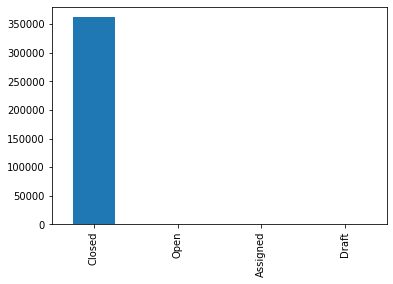

In [97]:
#checking the status of tickets
nyc1['Status'].value_counts().plot(kind='bar')
plt.show()

##### we can see here that all the tickets are closed

In [98]:
nyc1["Request_Closing_Time"] = nyc1["Closed Date"] - nyc1["Created Date"]

nyc1['Request_Closing_Hours'] = nyc1['Request_Closing_Time'].astype('timedelta64[h]')+1    #calculating hours
nyc1[['Request_Closing_Time','Request_Closing_Hours']].head(10)

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:30,1.0
1,0 days 01:27:13,2.0
2,0 days 04:51:34,5.0
3,0 days 07:45:27,8.0
4,0 days 03:27:44,4.0
5,0 days 01:53:41,2.0
6,0 days 01:58:22,2.0
7,0 days 01:48:49,2.0
8,0 days 08:33:34,9.0
9,0 days 01:23:42,2.0


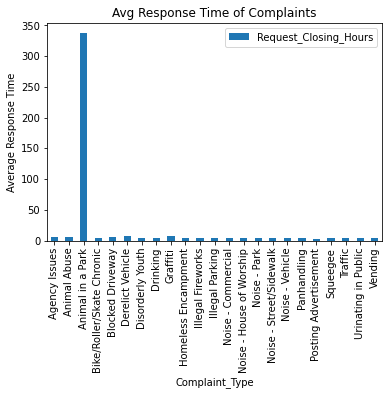

In [99]:
Resolution = nyc1.groupby(['Complaint Type'])[['Request_Closing_Hours']].mean()

Resolution.plot(kind='bar',title='Avg Response Time of Complaints', xlabel='Complaint_Type', ylabel='Average Response Time')
plt.show()


#### we can see that most of the complaints are resolved in a day but reponse time for type 'Animal in a Park' takes longer

Project By:
Archana Kokate

archanakkokate@gmail.com

Professional Certificate Program in Data Science

Cohort : 
PGP DS Sep 2022 COHORT 1